In [1]:
import spacy
import json
import re
import altair as alt
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
# oid=801694 No tiene solución explicita
print(spacy.__version__)

2.1.3


In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
stopwords = spacy.lang.en.STOP_WORDS
try:
    stopwords.remove('no')
    stopwords.remove('not')# We need the word "NO" for vulns that don't have solution
    stopwords.add('script_tag')
    stopwords.add('script_xref')
    stopwords.remove('of')
except:
    pass

In [6]:
openvas_df = pd.read_json('../DatasetInput/OpenvasLookup.json')

In [7]:
openvas_df[openvas_df['oid'] == 891477]

creation_date  \
5638  2018-08-26 00:00:00   

                                                                                                   cve  \
5638  [CVE-2018-10887, CVE-2018-10888, CVE-2018-15501, CVE-2018-15501, CVE-2018-10887, CVE-2018-10888]   

      cvss                 cvss_vector           filename  \
5638  5.8   AV:N/AC:M/Au:N/C:P/I:N/A:P  deb_dla_1477.nasl   

     last_modification_date     oid  \
5638  2019-03-18 15:24:29    891477   

                                                                plugin_name  \
5638  Debian LTS Advisory ([SECURITY] [DLA 1477-1] libgit2 security update)   

      script_category                 script_family  \
5638  ACT_GATHER_INFO  Debian Local Security Checks   

                                                                                                                            solution_from_plugin  \
5638  For Debian 8 'Jessie', these problems have been fixed in version\n0.21.1-3+deb8u1.\n\nWe recommend that you upgrade your libgit2 packages.   

     solution_type  \
5638  VendorFix      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  
5638  script_oid("1.3.6.1.4.1.25623.1.0.891477");\n  script_version("$Revision: 14270 $");\n  script_cve_id("CVE-2018-10887", "CVE-2018-10888", "CVE-2018-15501");\n  script_name("Debian LTS Advisory ([SECURITY] [DLA 1477-1] libgit2 security update)");\n  script_tag(name:"last_modification", value:"$Date: 2019-03-18 15:24:29 +0100 (Mon, 18 Mar 2019) $");\n  script_tag(name:"creation_date", value:"2018-08-26 00:00:00 +0200 (Sun, 26 Aug 2018)");\n  script_tag(name:"cvss_base", value:"5.8");\n  script_tag(name:"cvss_base_vector", value:"AV:N/AC:M/Au:N/C:P/I:N/A:P");\n  script_tag(name:"solution_type", value:"VendorFix");\n  script_tag(name:"qod_type", value:"package");\n\n  script_xref(name:"URL", value:"https://lists.debian.org/debian-lts-announce/2018/08/msg00024.html");\n\n  script_category(ACT_GATHER_INFO);\n\n  script_copyright("Copyright (c) 2018 Greenbone Networks GmbH http://gre

In [8]:
openvas_df_sample = openvas_df.sample(5000)
openvas_df_sample.head(10)

creation_date  \
26774  2016-02-12 00:00:00   
137    2009-04-10 19:06:18   
17256  2012-09-11 01:34:21   
38901  2013-09-12 11:47:44   
8546   2018-10-11 12:17:00   
6298   2018-05-16 05:59:40   
49115  2011-06-13 15:28:04   
10128  2014-09-22 18:58:08   
11257  2014-08-06 06:26:18   
42767  2017-03-15 14:08:22   

                                                                                                                                                                                        cve  \
26774  [CVE-2015-7511]                                                                                                                                                                        
137    []                                                                                                                                                                                     
17256  [CVE-2005-2971]                                                                                                                                                                        
38901  [CVE-2013-1060, CVE-2013-2140, CVE-2013-2232, CVE-2013-2234, CVE-2013-4162, CVE-2013-4163, CVE-2013-1060, CVE-2013-2140, CVE-2013-2232, CVE-2013-2234, CVE-2013-4162, CVE-2013-4163]   
8546   [CVE-2018-8292, CVE-2018-8292]                                                                                                                                                         
6298   [CVE-2017-6888]                                                                                                                                                                        
49115  [CVE-2011-2107]                                                                                                                                                                        
10128  [CVE-2013-5139, CVE-2013-5178]                                                                                                                                                         
11257  []                                                                                                                                                                                     
42767  [CVE-2017-0006, CVE-2017-0019]                                                                                                                                                         

       cvss                 cvss_vector  \
26774  1.9   AV:L/AC:M/Au:N/C:P/I:N/A:N   
137    0.0   AV:N/AC:L/Au:N/C:N/I:N/A:N   
17256  7.5   AV:N/AC:L/Au:N/C:P/I:P/A:P   
38901  6.9   AV:L/AC:M/Au:N/C:C/I:C/A:C   
8546   5.0   AV:N/AC:L/Au:N/C:P/I:N/A:N   
6298   4.3   AV:N/AC:M/Au:N/C:N/I:N/A:P   
49115  4.3   AV:N/AC:M/Au:N/C:N/I:P/A:N   
10128  9.3   AV:N/AC:M/Au:N/C:C/I:C/A:C   
11257  10.0  AV:N/AC:L/Au:N/C:C/I:C/A:C   
42767  9.3   AV:N/AC:M/Au:N/C:C/I:C/A:C   

                                                filename  \
26774  deb_3474.nasl                                       
137    linpha_detect.nasl                                  
17256  esoft_slk_ssa_2005_310_02.nasl                      
38901  gb_ubuntu_USN_1943_1.nasl                           
8546   gb_ms_powershell_info_disc_vuln_oct18_macosx.nasl   
6298   gb_fedora_2018_6a378e32c3_flac_fc28.nasl            
49115  gb_adobe_flash_player_xss_vuln_lin_jun11.nasl       
10128  gb_apple_macosx_mult_vuln08_sep14.nasl              
11257  gb_fedora_2014_1475_mupdf_fc19.nasl                 
42767  gb_ms_office_compat_pack_ms17-014.nasl              

      last_modification_date     oid  \
26774  2019-03-18 15:48:34    703474   
137    2018-10-12 15:47:20    100119   
17256  2019-03-15 10:16:15    55801    
38901  2019-03-13 10:25:59    841549   
8546   2018-12-12 09:39:09    814091   
6298   2019-03-15 14:49:35    874506   
49115  2018-10-20 13:59:41    802205   
10128  2019-03-19 10:10:40    804854   
11257  2019-03-15 14:49:35    861671   
42767  2018-11-23 15:24:09    810711   

    

In [9]:
def clean_text(text):
    text = re.sub(r'(script_oid|SCRIPT\_OID).*?\".*?\.(?P<oid>\d+)\"', '',text)
    text = re.sub(r'script\_family\(\"(?P<script_family>.*?)\"\)', '',text)
    text = re.sub(r'script_copyright.*', '', text)
    text = re.sub(r'script_dependencies.*', '', text)
    text = re.sub(r'script_mandatory_keys.*', '', text)
    text = re.sub(r'.*?cvss\_base\_vector.*', '', text)
    text = re.sub(r'script_version.*', '', text)
    text = re.sub(r'.*?last_modification.*', '', text)
    text = re.sub(r'.*?creation_date.*', '', text)
    text = re.sub(';', '' , text)
    text = re.sub('\"', '', text)
    text = re.sub('value\:', '', text)
    text = re.sub('name\:', '', text)
    text = re.sub('\(|\)', ' ', text)
    text = re.sub('if.*?(.*?description.*?)', '', text)
    text = re.sub('.*?script_xref.*', '', text)
    #text = re.sub('cve-\d+\-\d+', '', text)
    #text = re.sub('.*?script\_cve\_id.*', '', text)
    text = re.sub(',', '', text)
    return text

In [10]:
openvas_df_sample['cleaned_text'] = openvas_df_sample['text'].apply(clean_text)

In [11]:
openvas_df_sample['cleaned_text'] = openvas_df_sample['cleaned_text'].str.lower()

In [12]:
openvas_df_sample['filename'] = openvas_df_sample['filename'].str.lower()

In [13]:
from spacy.tokenizer import Tokenizer
def custom_tokenizer(nlp,regex):
    """Create a custom tokenizer that get complete CVE"""
    prefix_re = re.compile(regex)
    return Tokenizer(nlp.vocab, prefix_search = prefix_re.search)
nlp.tokenizer = custom_tokenizer(nlp,r'cve\-\d+\-\d+')

In [14]:
openvas_df_sample['nlp_text'] = openvas_df_sample['cleaned_text'].apply(nlp)

In [16]:
def remove_stopped_words(nlpobject):
    """Function that remove all the stop words and clean new lines and spaces"""
    text_without_stopped_words = [tok.text for tok in nlpobject if (tok.text not in stopwords and tok.pos_ != "PUNCT" and tok.pos_ != "SYM")]
    final_tokenized_words = map(str.rstrip, text_without_stopped_words)
    final_tokenized_words = filter(None, list(final_tokenized_words))
    final_tokenized_words = list(final_tokenized_words)
    return final_tokenized_words

In [17]:
openvas_df_sample['nlp_cleaned_text'] = openvas_df_sample['nlp_text'].apply(remove_stopped_words)

In [18]:
def nlpparser(objectlist):
    """Take the new tokenized list and parse into a spacy document"""
    doc = nlp.tokenizer.tokens_from_list(objectlist)
    nlp.tagger(doc)
    nlp.parser(doc)
    return doc

In [19]:
openvas_df_sample['nlp_cleaned_text'] = openvas_df_sample['nlp_cleaned_text'].apply(nlpparser)

In [20]:
columns_to_delete = ['cleaned_text', 'nlp_text']
openvas_df_sample.drop(columns_to_delete, axis=1, inplace=True)

In [21]:
#openvas_df_sample['informational_solution'] = openvas_df_sample['cvss'].apply(cvss_mapping)

In [22]:
from spacy.matcher import PhraseMatcher
def look_for_match(terminology_list,match_tag,document):
    matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
    #print(terminology_list,document)
    # Only run nlp.make_doc to speed things up
    patterns = [nlp.make_doc(text) for text in terminology_list]
    matcher.add(match_tag, None, *patterns)
    #doc = nlp(document)
    doc = document
    matches = matcher(doc)
    #for match_id, start, end in matches:
    #    span = doc[start:end]
    #    print(span.text)
    #print(len(matches) != 0)
    return len(matches) != 0

In [23]:
def look_for_solution(vec):
    SolutionPatch = "Update or patch installation"
    EOL = "End of life Platform"
    Info = "Informational"
    Workaround = "Workaround"
    NoPatch = "No solution or patch available"
    PolicyCompliance = "Policy compliance"
    UselessService = "Unsafe or useless service"
    ConfigurationChanges = "Configuration changes"
    SSLTLS = "SSL/TLS hardening"
    #####OPENVAS ONLY###############
    ToClassify = "To classify"
    GSHB = "GSHB Family"
    NMAP = "NMAP Family"
    cvss_row = vec[2]
    document_row = vec[13]
    solution = ToClassify
    if look_for_match(["vendorfix","upgrade", "update", "patch", "hotfix", "apply", "updates"], "PatchSolution", document_row):
        solution = SolutionPatch
    if look_for_match(["end of life", "eol"],"EndOfLife",document_row):
        solution = EOL
    if look_for_match(["default credentials", "useless services" , "mitigation", "default accounts", "reconfigure", "change", "remove", "comment", "set"], "ConfigurationChanges", document_row):
        solution = ConfigurationChanges
    if look_for_match(["willnotfix", "will not fix", "unfixed", "noneavailable"],"NoSolution",document_row):
        solution = NoPatch
    if look_for_match(["useless services", "disable service"], "UselessServices", document_row):
        solution = UselessService
    if look_for_match(["workaround"], "Workaround", document_row):
        solution = Workaround
    if cvss_row == 0.0:
        solution = Info
    return solution

In [ ]:
#openvas_df_sample['eol_solution'] = openvas_df_sample['nlp_cleaned_text'].apply(look_for_eol)

In [24]:
openvas_df_sample1 = openvas_df_sample[openvas_df_sample['oid'] == 100586 ]

In [25]:
#openvas_df_sample1['solution_type'] = openvas_df_sample1.apply(look_for_solution,axis=1)
openvas_df_sample['custom_solution_type'] = openvas_df_sample.apply(look_for_solution,axis=1)

In [26]:
#openvas_df_sample[openvas_df_sample['oid'] == 80089].sample(1)
#openvas_df_sample[openvas_df_sample['oid'] == 105845]
#print(openvas_df_sample[openvas_df_sample['solution_type'] == "To classify"].count())
openvas_df_sample[openvas_df_sample['custom_solution_type'] != "Update or patch installation"].sample(2)
#openvas_df_sample1

creation_date              cve  cvss                 cvss_vector  \
2843   2010-04-27 10:02:59  []               0.0   AV:N/AC:L/Au:N/C:N/I:N/A:N   
12875  2014-02-10 15:38:15  [CVE-2013-6235]  4.3   AV:N/AC:M/Au:N/C:N/I:P/A:N   

                           filename last_modification_date     oid  \
2843   gshb_wmi_eventlogpolset.nasl  2018-08-14 11:36:21    96050    
12875  gb_jamon_mult_xss_vuln.nasl   2018-09-15 11:13:36    803799   

                                               plugin_name  script_category  \
2843   \\                                                   ACT_GATHER_INFO   
12875  JAMon Multiple Cross-Site Scripting Vulnerabilities  ACT_ATTACK        

                script_family  \
2843   IT-Grundschutz           
12875  Web application abuses   

                                                                                                                                                                                                                                                                                    solution_from_plugin  \
2843   None                                                                                                                                                                                                                                                                                                
12875  No known solution was made available for at least one year since the disclosure of this vulnerability.\nLikely none will be provided anymore.\nGeneral solution options are to upgrade to a newer release, disable respective features, remove the product or replace the product by another one.   

      solution_type  \
2843   None           
12875  WillNotFix     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [27]:
sample_to_graph = openvas_df_sample[['oid','script_category','custom_solution_type','script_family','cvss']].groupby(['custom_solution_type','script_category','cvss']).count().reset_index()

In [28]:
sample_to_graph = sample_to_graph[sample_to_graph['custom_solution_type'] != "Informational"]
sample_to_graph = sample_to_graph[sample_to_graph['custom_solution_type'] != "To classify"]

In [29]:
sample_to_graph.sample(2)

custom_solution_type  script_category  cvss  oid  script_family
146  Update or patch installation    ACT_GATHER_INFO  4.3   359  359          
85   No solution or patch available  ACT_GATHER_INFO  4.6   1    1

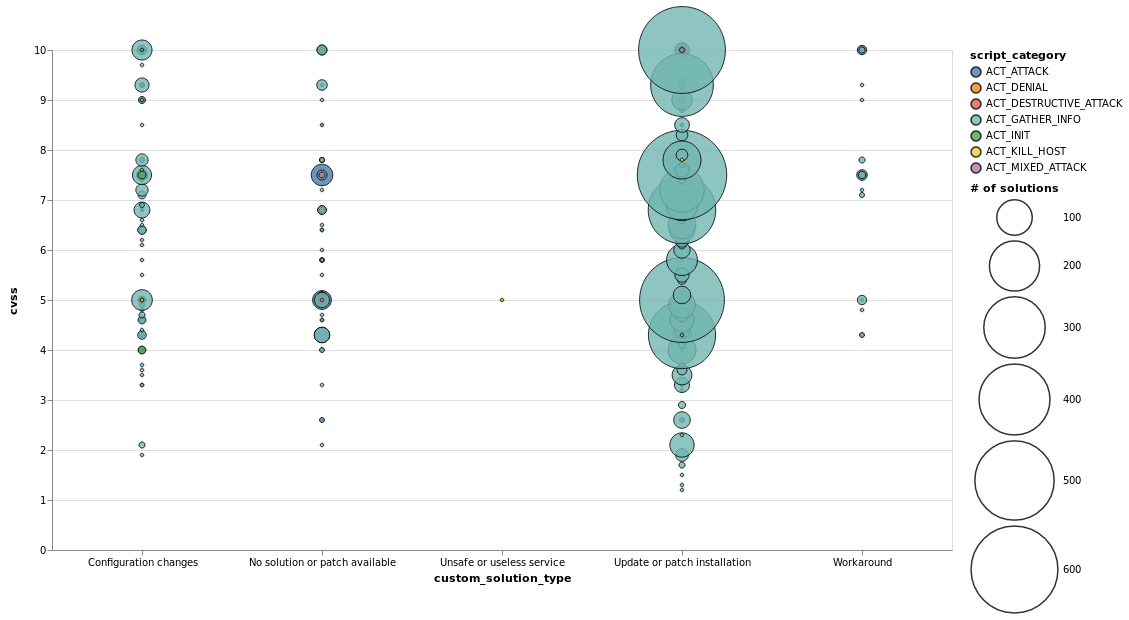

In [30]:
import altair as alt
source = sample_to_graph
alt.Chart(source).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('custom_solution_type', axis=alt.Axis(labelAngle=0)),
    alt.Y('cvss'),
    alt.Size('oid',
        scale=alt.Scale(range=[0, 8000]),
        legend=alt.Legend(title='# of solutions')
    ),
    alt.Color('script_category')
).properties(
    width=900,
    height=500
)

In [ ]:
for token in nlp('Upgrade to Adobe AIR version 15.0.0.249\n or later'):
    print(token.lemma_,token.pos_, token.is_oov)

In [ ]:
openvas_df_sample[openvas_df_sample['filename'].str.contains('adobe')].sample(2)

In [ ]:
apples = nlp(u"I like apples")
oranges = nlp(u"I like oranges")
apples_oranges = apples.similarity(oranges)
oranges_apples = oranges.similarity(apples)
print(apples_oranges)
print(oranges_apples)

In [ ]:
a = nlp('upgrade adobe flash player google chrome 26.0.0.137 later')
b = nlp('upgrade adobe air version 15.0.0.249 later')
a_b = b.similarity(a)
print(a_b)

In [ ]:
a = nlp('upgrade adobe air version 15.0.0.249 later')
b = nlp('upgrade adobe air version 16.0.0.249 later')
a_b = b.similarity(a)
print(a_b)

In [ ]:
a = openvas_df_sample[openvas_df_sample['oid'] == 811471]['nlp_cleaned_text'].iloc[0]
b = openvas_df_sample[openvas_df_sample['oid'] == 804843]['nlp_cleaned_text'].iloc[0]
a_b = b.similarity(a)
print(a_b)

In [ ]:
a = openvas_df_sample[openvas_df_sample['oid'] == 801420]['nlp_cleaned_text'].iloc[0]
b = openvas_df_sample[openvas_df_sample['oid'] == 803452]['nlp_cleaned_text'].iloc[0]
a_b = b.similarity(a)
print(a_b)

In [175]:
openvas_df = pd.read_json('OpenvasLookup.json')
openvas_df_sample = openvas_df.sample(5000)
openvas_df_sample1 = openvas_df_sample[openvas_df_sample['solution_type'] != 'VendorFix'].sample(10)
openvas_df_sample1

creation_date              cve  cvss                 cvss_vector  \
25246  2015-07-07 16:52:25  [CVE-2014-8396]   4.6  AV:L/AC:L/Au:N/C:P/I:P/A:P   
50178  2011-10-14 14:22:41               []   7.5  AV:N/AC:L/Au:N/C:P/I:P/A:P   
48209  2011-10-04 16:55:13  [CVE-2011-3689]   4.3  AV:N/AC:M/Au:N/C:N/I:P/A:N   
32433  2009-04-05 13:52:05  [CVE-2009-4794]   7.5  AV:N/AC:L/Au:N/C:P/I:P/A:P   
19     2015-02-06 14:11:41               []   0.0  AV:N/AC:L/Au:N/C:N/I:N/A:N   
2687   2017-09-27 12:06:59               []   0.0  AV:N/AC:L/Au:N/C:N/I:N/A:N   
2545   2018-12-12 10:15:08               []   0.0  AV:N/AC:L/Au:N/C:N/I:N/A:N   
3235   2010-02-25 12:13:41               []   0.0  AV:N/AC:L/Au:N/C:N/I:N/A:N   
32655  2009-09-08 18:25:53  [CVE-2009-3008]   4.3  AV:N/AC:M/Au:N/C:N/I:P/A:N   
352    2017-01-11 15:14:18               []   0.0  AV:N/AC:L/Au:N/C:N/I:N/A:N   

                                                filename  \
25246  gb_corel_pdf_fusion_code_exec_vuln_july15_win....   
50178   gb_mybb_mystatus_plugin_statid_sql_inj_vuln.nasl   
48209      gb_codemeter_webadmin_boxserial_xss_vuln.nasl   
32433                           community_cms_34303.nasl   
19                                   gb_gogs_detect.nasl   
2687                                gb_pydio_detect.nasl   
2545                      gb_smb_lsc_fetch_file_ver.nasl   
3235                                    GSHB_M4_002.nasl   
32655            gb_k-meleon_addr_bar_spoofing_vuln.nasl   
352                 gb_docker_service_detection_lsc.nasl   

      last_modification_date     oid  \
25246    2018-10-12 13:22:41  805674   
50178    2018-10-20 13:59:41  802040   
48209    2018-10-12 18:05:33  801989   
32433    2019-03-19 15:22:43  100104   
19       2018-11-13 06:25:34  105951   
2687     2018-10-12 15:47:20  113003   
2545     2018-12-12 11:35:08  108517   
3235     2018-07-25 17:14:01  894002   
32655    2018-09-22 17:11:42  800892   
352      2018-10-12 15:47:20  140119   

                                             plugin_name  script_category  \
25246  Corel PDF Fusion Arbitrary Code Execution Vuln...  ACT_GATHER_INFO   
50178         MyBB MyStatus Plugin process-mystatus.php        ACT_ATTACK   
48209                                CodeMeter WebAdmin   ACT_GATHER_INFO   
32433                                     Community CMS        ACT_ATTACK   
19                       Gogs (Go Git Service) Detection  ACT_GATHER_INFO   
2687                                     Pydio Detection  ACT_GATHER_INFO   
2545   SMB: Gather file version info for authenticate...  ACT_GATHER_INFO   
3235             IT-Grundschutz M4.002: Bildschirmsperre  ACT_GATHER_INFO   
32655        K-Meleon Address Bar Spoofing Vulnerability  ACT_GATHER_INFO   
352                       Docker Service Detection (LSC)  ACT_GATHER_INFO   

                script_family  \
25246                 General   
50178  Web application abuses   
48209  Web application abuses   
32433  Web application abuses   
19          Product detection   
2687        Product detection   
2545                  Windows   
3235        IT-Grundschutz-11   
32655                 General   
352         Product detection   

                                    solution_from_plugin solution_type  \
25246  As a workaround users should avoid opening\n  ...    Workaround   
50178  No known solution was made available for at le...    WillNotFix   
48209  No known solution was made available for at le...    WillNotFix   
32433  No known solution was made available for at le...    WillNotFix   
19                                                  None          None   
2687                                                None          None   
2545                                                None          None   
3235                                                None          None   
32655  No known solution was made available for at le...    WillNotFix   
352                                                 None          N

In [ ]:
solution_text = openvas_df_sample1['solution_from_plugin'][25246]
solution_text

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp = spacy.load("en_core_web_md") 

In [ ]:
nlp = spacy.load("en_core_web_lg")  # The best with dependencies and entities

In [ ]:
nlp = spacy.load('en_vectors_web_lg') # Consume resorces and it did not work for my case

In [15]:
# oid 811266 con ejemplo de versión
# oid 15708 que tiene entidades
# oid 852281 para revisar abiguedad de la palabra "update"
# oid 805038 una de Winbugs
# oid 803223 sin solución
# oid 808668 tiene versión de PHP
doc = nlp(solution_text)
doc.ents

NameError: name 'solution_text' is not defined

In [178]:
withoutstoppedwords = remove_stopped_words(doc)
print(' '.join(withoutstoppedwords))
for word in doc.sents:
    print(word, nlp('upgrade').similarity(word), "Update")
    print(word, nlp('update').similarity(word), "Update")
    print(word, nlp('no know').similarity(word), "No solution")
    print(word, nlp('disable').similarity(word), "Configuration Changes")
for word in withoutstoppedwords:
    print(word, nlp('no known').similarity(nlp(word)))

As workaround users avoid opening untrusted files extensions associated Corel software contain of DLL files
As a workaround users should avoid opening
  untrusted files whose extensions are associated with Corel software and contain
  any of the DLL files. 0.4481727927058953 Update
As a workaround users should avoid opening
  untrusted files whose extensions are associated with Corel software and contain
  any of the DLL files. 0.4966979204675399 Update
As a workaround users should avoid opening
  untrusted files whose extensions are associated with Corel software and contain
  any of the DLL files. 0.6331219338523874 No solution
As a workaround users should avoid opening
  untrusted files whose extensions are associated with Corel software and contain
  any of the DLL files. 0.4858647888431823 Configuration Changes
As 0.7329337898326528
workaround 0.1634254150483309
users 0.28539554372490966
avoid 0.5397393953070359
opening 0.36218122460259206
untrusted 0.04120779423060853
files 0.211

In [51]:
words = solution_text.split(' ')
len_words = len(words)
total = np.zeros(300)
for word in words:
    word_vec = nlp(word).vector
    total += word_vec
average = total / len_words
average.mean()

0.011969833713654747

In [54]:
doc.vector.mean()

0.012049149

In [42]:
word_vector_list = [nlp(word).vector for word in solution_text.split(' ')]
average_word_vector = np.mean(word_vector_list, axis=0)
print(average_word_vector.mean())

0.011969835


In [8]:
spacy.displacy.render(doc, style='ent',jupyter=True)

In [9]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
spacy.displacy.render(doc.sents, style="dep", options=options)

In [10]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

Upgrade ROOT Upgrade VERB [to, .]
to prep Upgrade VERB [Professional]
WhatsUp compound Professional PROPN []
Professional pobj to ADP [WhatsUp, 2006.01, or, later]
2006.01 appos Professional PROPN []
or cc Professional PROPN []
later conj Professional PROPN []
. punct Upgrade VERB []


In [11]:
nlp('what ever you want to say').vector

array([-4.61606681e-02,  2.70996660e-01, -2.57153332e-01, -8.58928189e-02,
        1.22234665e-01, -5.04591651e-02,  2.95414999e-02, -3.74745019e-02,
       -6.24516495e-02,  2.62631679e+00, -3.14153343e-01, -6.17738366e-02,
        1.65180847e-01,  9.84373316e-02, -2.01838329e-01, -1.60389677e-01,
       -1.60568997e-01,  8.99946690e-01, -2.77950853e-01, -4.78104986e-02,
        2.38574997e-01,  2.45500100e-03,  8.92656669e-02, -5.44428341e-02,
       -2.37159505e-01,  9.75659266e-02, -5.77477328e-02, -1.26298681e-01,
        1.54919669e-01, -1.91032484e-01, -7.09974533e-03,  2.94726670e-01,
       -9.01511684e-02,  1.72985002e-01,  1.64951667e-01, -4.87188362e-02,
        4.70843315e-02,  1.49054170e-01, -1.75968334e-01, -7.09045008e-02,
       -1.25552341e-01,  6.48815706e-02, -2.71210000e-02, -1.72420844e-01,
        7.10946694e-02,  7.43970647e-02, -2.09198311e-01,  3.13890725e-03,
        3.97112221e-02,  6.70885816e-02, -1.75280020e-01,  6.86494187e-02,
        4.24728282e-02, -